In [7]:
#Import Library 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns

# Global Arrays store travel times for GC_MOX
turps_times = []
hexane_times = []

turps_widths = []
hexane_widths = []

t_76 = []
t_77 = []
gas_input = []
gas_output = []

In [8]:
# Loads CSV file into time and gas arrays.

def load_csv(filename):
    """  Input is a csv file. load_csv will load this file into arrays.
    """
    
    t_76.clear()
    t_77.clear()
    gas_input.clear()
    gas_output.clear()

    with open(filename, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader)  # skip header
        for row in reader:
            if row[0] != "DATA":
                continue
            #t.append(float(row[2]))
            if row[3] == "0x77":
                gas_input.append(float(row[4]))
                t_76.append(float(row[2]))
            else:
                gas_output.append(float(row[4]))
                t_77.append(float(row[2]))

    return t_76, t_77, gas_input, gas_output      

    
   

In [9]:
# Function plots input and output gas. Allows you to add limit if needed to isolate individual peaks.

def plot_gc(t_76, t_77, gas_input, gas_output, t_minimum = None, t_maximum = None, title_name = None):
    """ Enter arrays for input and output time and gas values. Add limits and a title if you want to view indiviual peaks closer.
    """
    #  Create a figure and the primary axes object
    fig, ax1 = plt.subplots(figsize=(8, 6)) #
    
    # 2. Create a twin Axes object that shares the x-axis
    ax2 = ax1.twinx()
    
    # 3. Plot the first variable on the primary axis (ax1)
    ax1.plot(t_77, gas_input, color='red', label='Input')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Input Gas Resistance (ohms)', color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    
    # 4. Plot the second variable on the twin axis (ax2)
    ax2.plot(t_76, gas_output, color='blue', label='Output')
    ax2.set_ylabel('Output Gas Resistance (ohms)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # Optional: Add a title and legends to clarify which line corresponds to which axis
    plt.title('GC MOX (1ml sample)')
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9)) # Adjust legend position as needed

    # If their are 7 inputs
    if t_minimum is not None and t_maximum is not None and title_name is not None:
        plt.xlim(t_minimum, t_maximum)
        plt.title(title_name)
    
    # 5. Display the plot
    plt.show()

    

In [10]:
# Function finds the time for a smell to travel through the GC_MOX and adds it to the array

def get_peak_width(in_min, in_max, out_min, out_max, smell):
    """
    Enter a min and max input value that captures the whole input peak. Also enter a min and max output value that captures the 
    whole output peak. The 5th input variable is a string which is the type of smell you are measuring. The function will print time stamps 
    of key points. It will also work out the peak widths and the time for the smell to travel through the GC Quad.
    """

    s76 = pd.Series(gas_output, index = t_76)
    s77 = pd.Series(gas_input, index = t_77)
    
    output_peak = s76.loc[out_min:out_max]
    input_peak = s77.loc[in_min:in_max]
    
    # Get Minimum for the Peak and Steady condition.
    peak_gas = output_peak.min()
    peak_77 = input_peak.min()
    base_gas = output_peak.max()
    base_77 = input_peak.max()
    
    # Work out half R. Find t at that vlue.
    gas_edge = (base_gas + peak_gas)/ 2
    edge_77 = (base_77+ peak_77) / 2 
    
    # Get the time the peaks occur at
    out_mid = (output_peak - peak_gas).abs().idxmin()
    in_mid  = (input_peak  - peak_77 ).abs().idxmin()

    print("Input peak occurs at time =",in_mid,"s\nOutput peak occurs at time =", out_mid,"s")

    input_front = s77.loc[in_min:in_mid]   # get front edge of input
    input_back = s77.loc[in_mid:in_max]   # get back edge of input
    
    output_front = s76.loc[out_min:out_mid]   # get front edge of output
    output_back = s76.loc[out_mid:out_max]   # get back edge of output
    
    # halfway resistances
    gas_edge = (base_gas + peak_gas)/ 2
    edge_77 = (base_77+ peak_77) / 2
 
    # input time width
    in_t_front = (input_front - edge_77).abs().idxmin()
    in_t_back = (input_back - edge_77).abs().idxmin()

    in_peak = in_t_back - in_t_front
    print("front edge:",in_t_front,"s back edge:", in_t_back, "s \nInput width is:", in_peak, "s")

    # output time width
    out_t_front = (output_front - gas_edge).abs().idxmin()
    out_t_back = (output_back - gas_edge).abs().idxmin()

    out_peak = out_t_back - out_t_front
    print("front edge:",out_t_front,"s back edge:", out_t_back, "s \nOutput width is:", out_peak, "s")

    
    dt = out_t_front - in_t_front
    print("The Input time is: ", in_t_front)
    print("The Output time is: ", out_t_front )
    print("The total time is: ", dt)

    if (smell == "turps"):
        turps_times.append(dt)
        turps_widths.append(in_peak)
    if (smell == "hexane"):
        hexane_times.append(dt)
        hexane_widths.append(in_peak)
    

In [11]:
def distribution(times):
    """
    Enter an array of time data. This function will create a probabilty distribution and give key data like the mean and standard deviation
    """
    mean = np.mean(times)             
    std = np.std(times)
    print("the mean is:", mean)
    print("the std is:", std)
    plt.figure(figsize=(8, 6)) # Optsional: Adjust figure size
    sns.histplot(x=times, kde=True) # The kde=True parameter overlays a Kernel Density Estimation curve
    
    # 3. Add labels and title
    plt.title("Distribution Plot of Data Array")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    
    # 4. Display the plot
    plt.show()

In [12]:
 
t_76, t_77, gas_input, gas_output = load_csv("turps_3_2_26_5V_10am.csv")


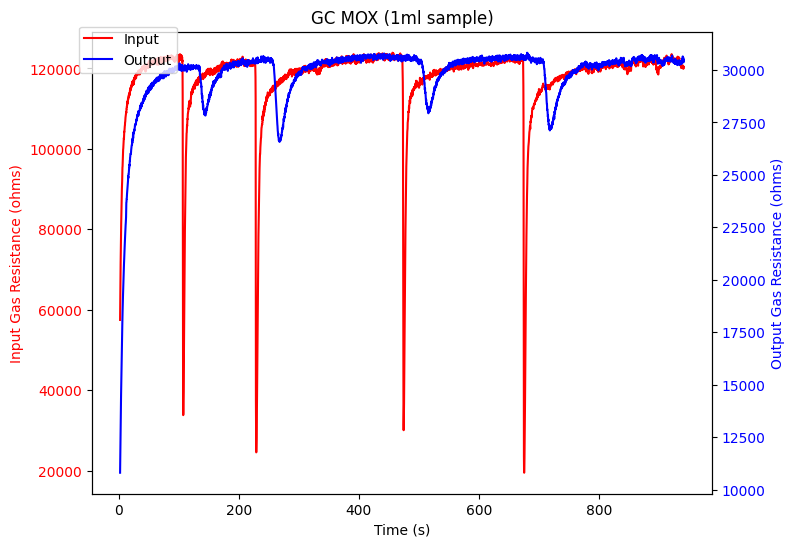

In [13]:
# Plot 1st Turps dataset
plot_gc(t_76, t_77, gas_input, gas_output)

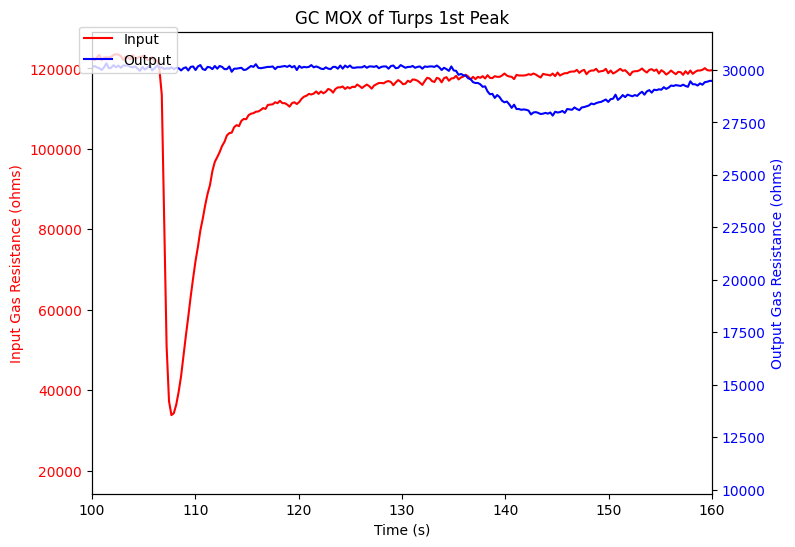

In [14]:
plot_gc(t_76, t_77, gas_input, gas_output, 100, 160, 'GC MOX of Turps 1st Peak')

In [15]:
get_peak_width(100, 120, 100, 165,"turps")

Input peak occurs at time = 107.696 s
Output peak occurs at time = 144.595 s
front edge: 106.995 s back edge: 110.495 s 
Input width is: 3.5 s
front edge: 138.286 s back edge: 154.875 s 
Output width is: 16.589 s
The Input time is:  106.995
The Output time is:  138.286
The total time is:  31.290999999999997


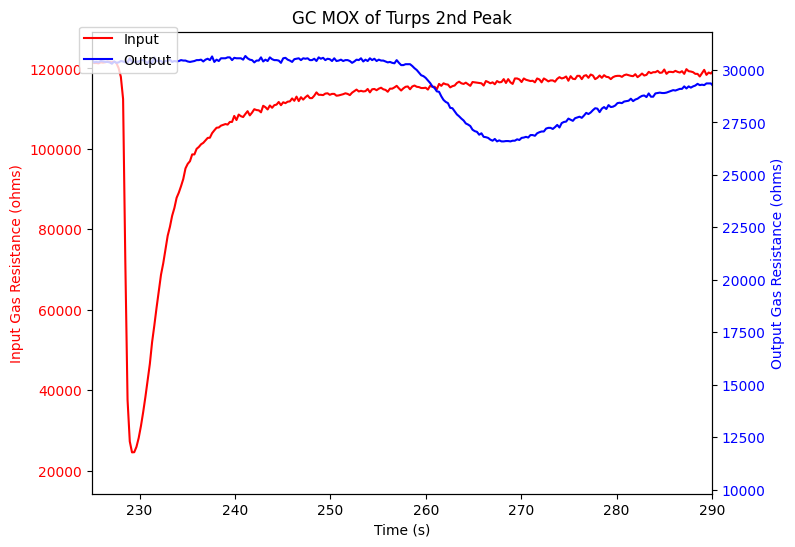

Input peak occurs at time = 229.206 s
Output peak occurs at time = 267.473 s
front edge: 228.503 s back edge: 232.479 s 
Input width is: 3.9760000000000275 s
front edge: 261.863 s back edge: 281.503 s 
Output width is: 19.639999999999986 s
The Input time is:  228.503
The Output time is:  261.863
The total time is:  33.360000000000014


In [16]:
plot_gc(t_76, t_77, gas_input, gas_output, 225, 290, 'GC MOX of Turps 2nd Peak')
get_peak_width(225, 250, 225, 290, "turps")

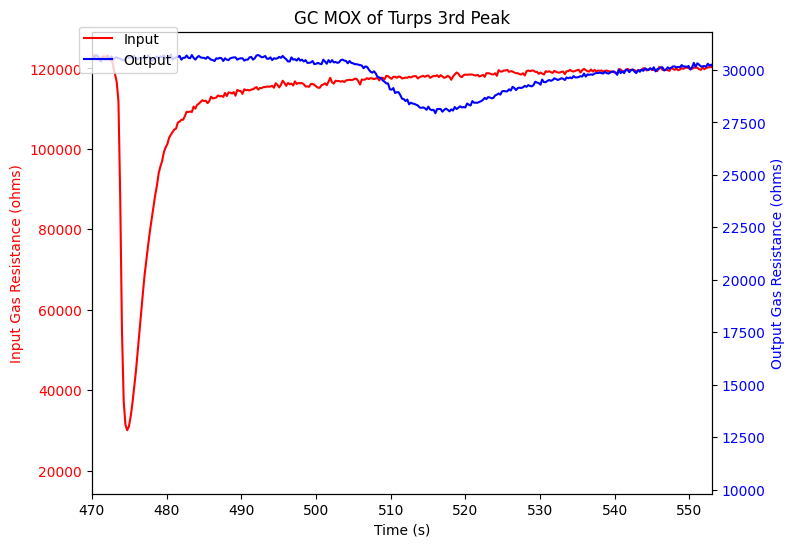

Input peak occurs at time = 474.726 s
Output peak occurs at time = 515.982 s
front edge: 473.79 s back edge: 477.534 s 
Input width is: 3.7439999999999714 s
front edge: 510.351 s back edge: 528.883 s 
Output width is: 18.53200000000004 s
The Input time is:  473.79
The Output time is:  510.351
The total time is:  36.56099999999998


In [17]:
plot_gc(t_76, t_77, gas_input, gas_output, 470, 553, 'GC MOX of Turps 3rd Peak')
get_peak_width(470, 500, 502, 550, "turps")

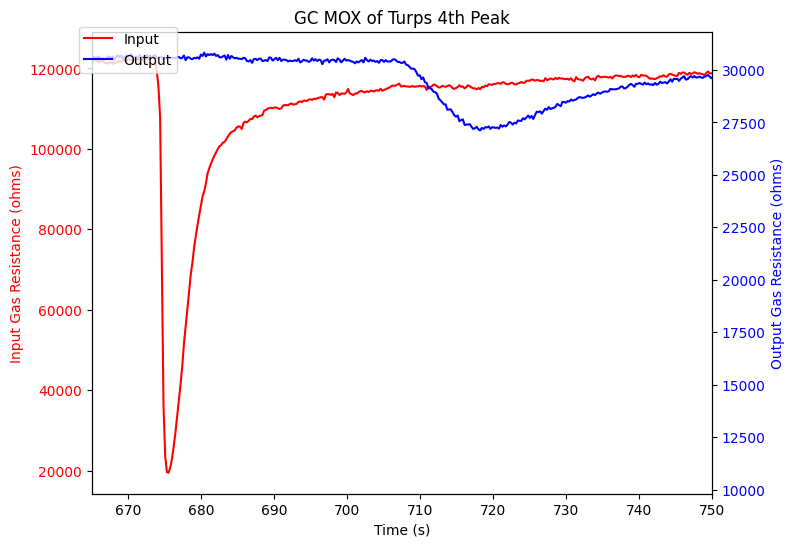

Input peak occurs at time = 675.516 s
Output peak occurs at time = 718.23 s
front edge: 674.585 s back edge: 678.783 s 
Input width is: 4.197999999999979 s
front edge: 712.307 s back edge: 733.735 s 
Output width is: 21.427999999999997 s
The Input time is:  674.585
The Output time is:  712.307
The total time is:  37.72199999999998


In [18]:
plot_gc(t_76, t_77, gas_input, gas_output, 665, 750, 'GC MOX of Turps 4th Peak')
get_peak_width(670, 700, 700, 740, "turps")

In [19]:
#2nd turps dataset

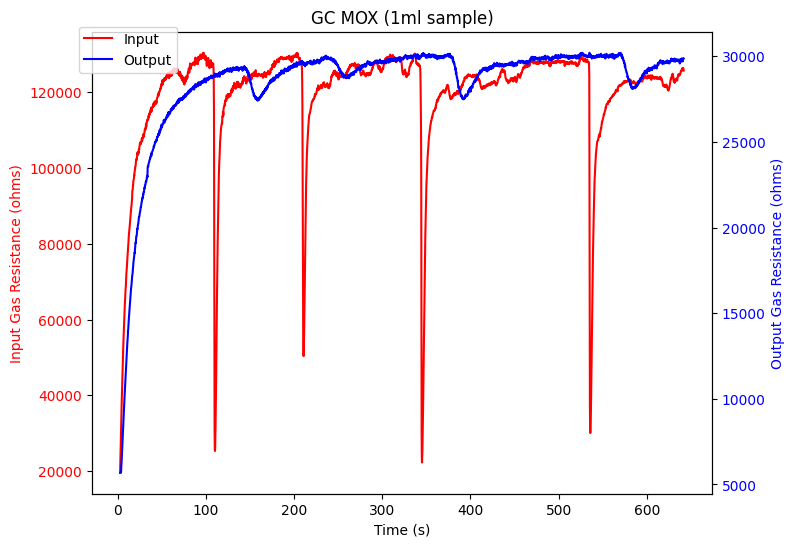

In [20]:
t_76, t_77, gas_input, gas_output = load_csv("turps_3_2_26_5V_10.5am.csv")
# Plot 2nd Turps dataset
plot_gc(t_76, t_77, gas_input, gas_output)

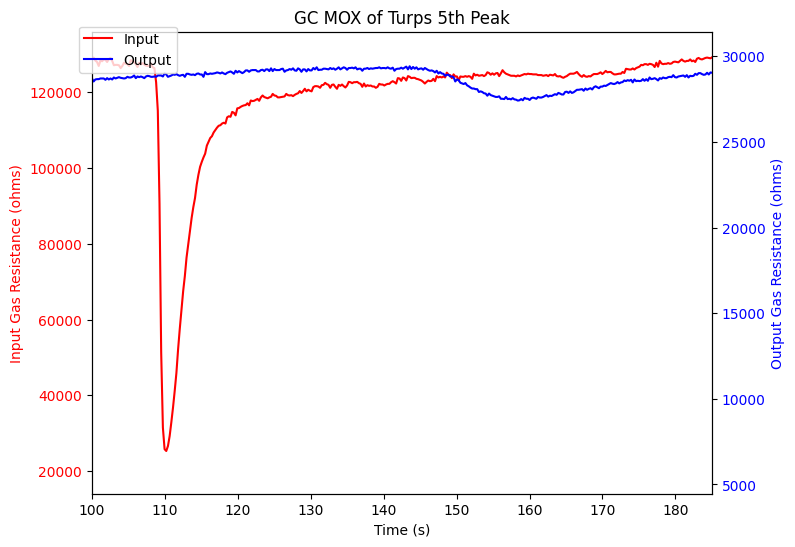

Input peak occurs at time = 110.194 s
Output peak occurs at time = 158.388 s
front edge: 109.268 s back edge: 112.973 s 
Input width is: 3.7049999999999983 s
front edge: 150.742 s back edge: 171.832 s 
Output width is: 21.090000000000003 s
The Input time is:  109.268
The Output time is:  150.742
The total time is:  41.47399999999999


In [21]:
plot_gc(t_76, t_77, gas_input, gas_output, 100, 185, 'GC MOX of Turps 5th Peak')
get_peak_width(100, 130, 140, 185,"turps")

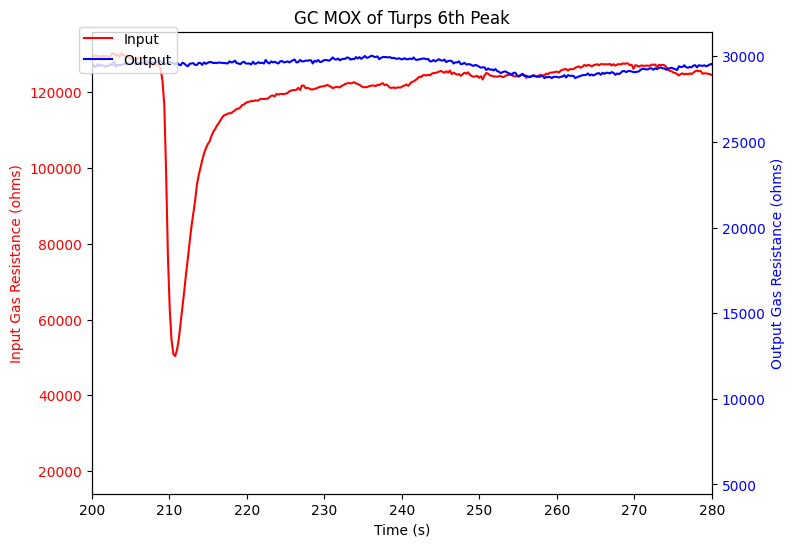

Input peak occurs at time = 210.744 s
Output peak occurs at time = 258.388 s
front edge: 209.574 s back edge: 213.316 s 
Input width is: 3.7419999999999902 s
front edge: 250.186 s back edge: 274.8 s 
Output width is: 24.614000000000004 s
The Input time is:  209.574
The Output time is:  250.186
The total time is:  40.611999999999995


In [22]:
plot_gc(t_76, t_77, gas_input, gas_output, 200, 280, 'GC MOX of Turps 6th Peak')
get_peak_width(200,230,240,280,"turps")

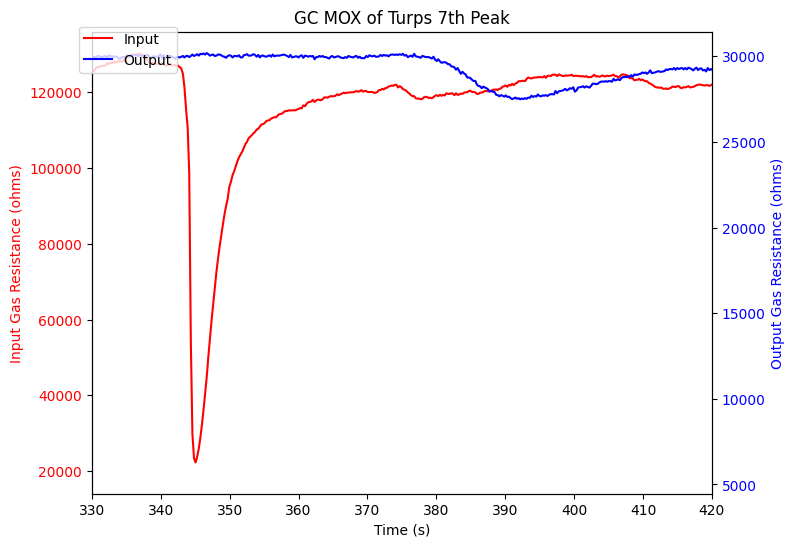

Input peak occurs at time = 345.051 s
Output peak occurs at time = 392.178 s
front edge: 344.36 s back edge: 348.307 s 
Input width is: 3.9470000000000027 s
front edge: 384.485 s back edge: 407.813 s 
Output width is: 23.327999999999975 s
The Input time is:  344.36
The Output time is:  384.485
The total time is:  40.125


In [23]:
plot_gc(t_76, t_77, gas_input, gas_output, 330, 420, 'GC MOX of Turps 7th Peak')
get_peak_width(330, 370, 330, 420, "turps")

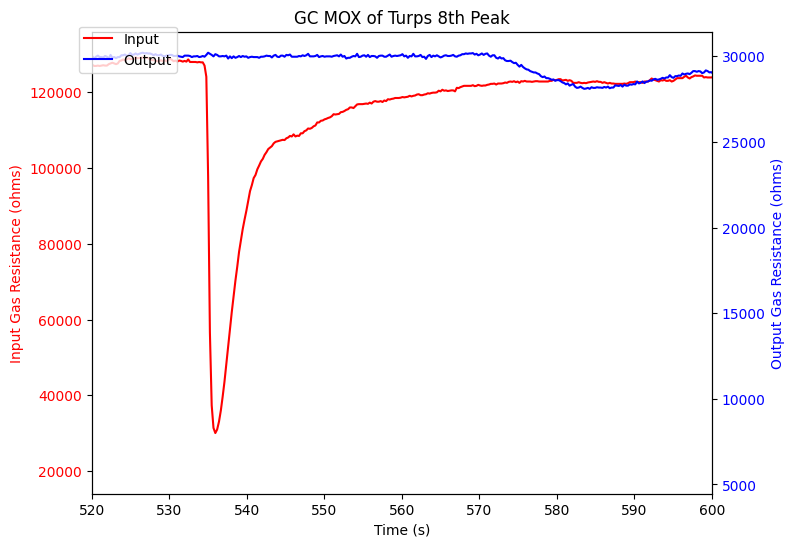

Input peak occurs at time = 535.926 s
Output peak occurs at time = 583.524 s
front edge: 534.995 s back edge: 539.223 s 
Input width is: 4.227999999999952 s
front edge: 576.55 s back edge: 597.588 s 
Output width is: 21.03800000000001 s
The Input time is:  534.995
The Output time is:  576.55
The total time is:  41.55499999999995


In [24]:
plot_gc(t_76, t_77, gas_input, gas_output, 520, 600, 'GC MOX of Turps 8th Peak')
get_peak_width(525, 560, 525, 600, "turps")

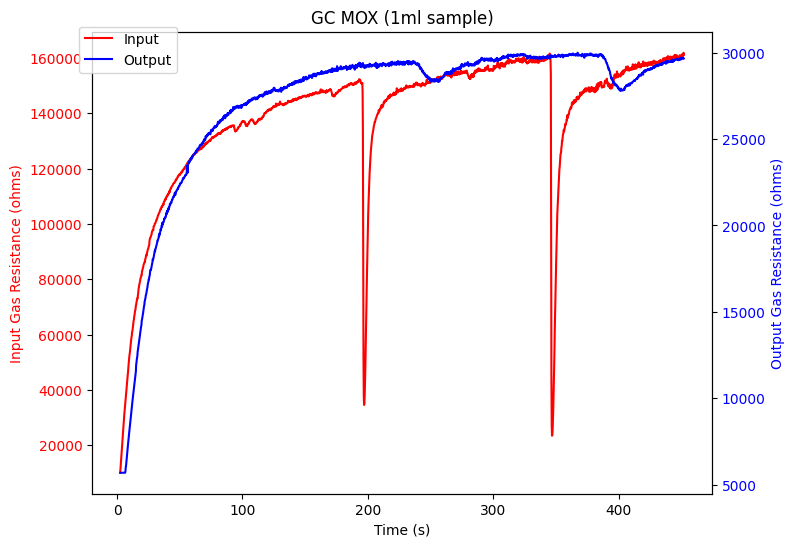

In [25]:
t_76, t_77, gas_input, gas_output = load_csv("turps_3_2_26_5V_1pm.csv")
# Plot 3rd Turps dataset
plot_gc(t_76, t_77, gas_input, gas_output)

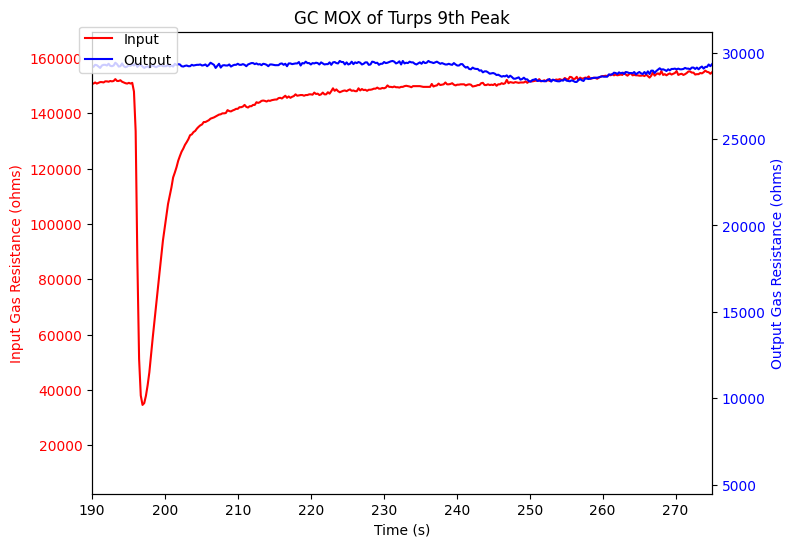

Input peak occurs at time = 196.923 s
Output peak occurs at time = 256.219 s
front edge: 196.216 s back edge: 199.721 s 
Input width is: 3.5049999999999955 s
front edge: 243.82 s back edge: 266.202 s 
Output width is: 22.382000000000005 s
The Input time is:  196.216
The Output time is:  243.82
The total time is:  47.603999999999985


In [26]:
plot_gc(t_76, t_77, gas_input, gas_output, 190, 275, 'GC MOX of Turps 9th Peak')
get_peak_width(190, 230, 190, 275, "turps")

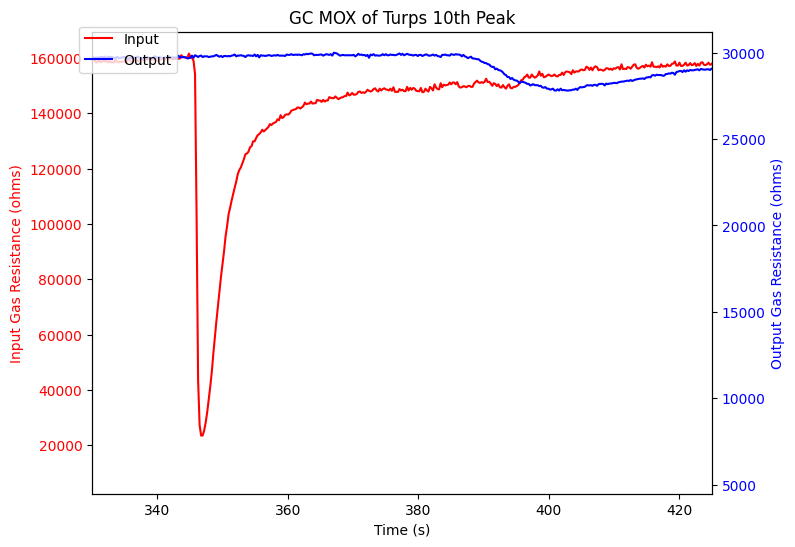

Input peak occurs at time = 346.72 s
Output peak occurs at time = 400.867 s
front edge: 346.019 s back edge: 350.232 s 
Input width is: 4.213000000000022 s
front edge: 392.723 s back edge: 419.778 s 
Output width is: 27.055000000000007 s
The Input time is:  346.019
The Output time is:  392.723
The total time is:  46.70400000000001


In [27]:
plot_gc(t_76, t_77, gas_input, gas_output, 330, 425, 'GC MOX of Turps 10th Peak')
get_peak_width(330, 380, 330, 425, "turps")

the mean is: 39.700799999999994
the std is: 4.9376348751198655


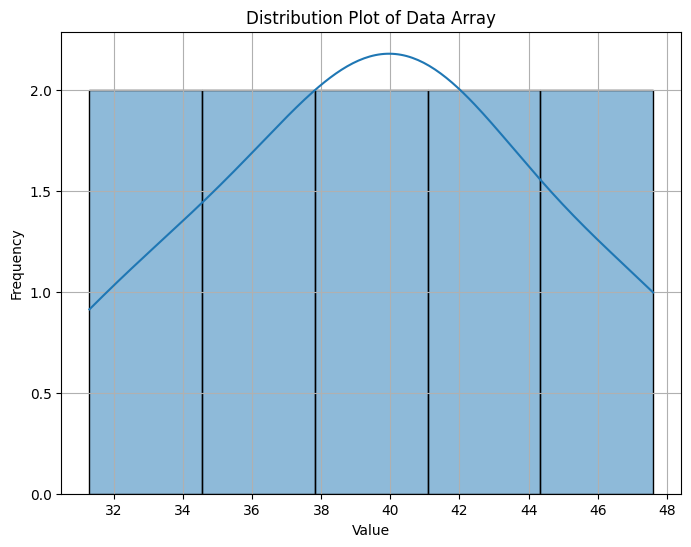

In [28]:
distribution(turps_times)

In [29]:
# Hexane dataset

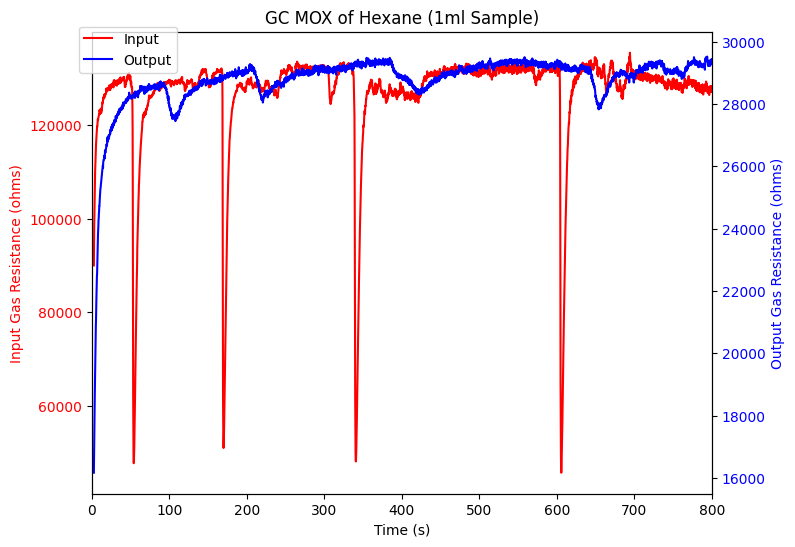

In [30]:
t_76, t_77, gas_input, gas_output = load_csv("hexane_3_2_26_5V_11am.csv")
plot_gc(t_76, t_77, gas_input, gas_output, 0, 800, "GC MOX of Hexane (1ml Sample)")

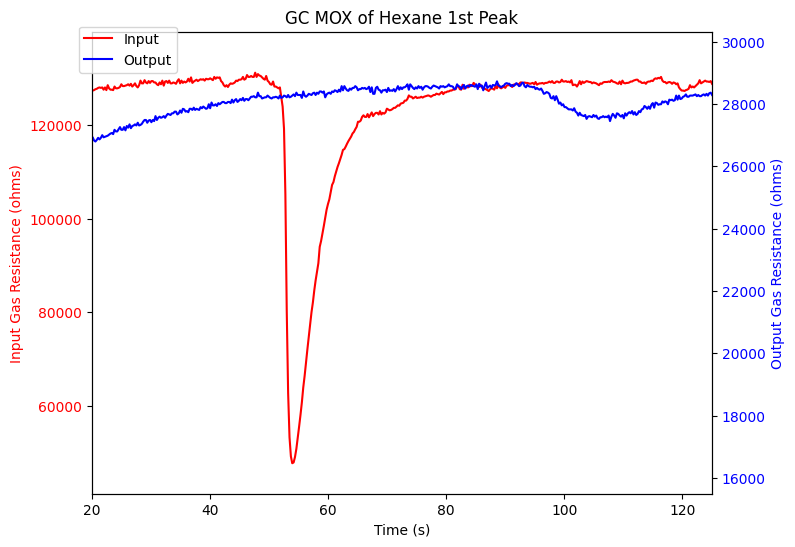

Input peak occurs at time = 53.929 s
Output peak occurs at time = 107.746 s
front edge: 52.998 s back edge: 58.121 s 
Input width is: 5.123000000000005 s
front edge: 98.406 s back edge: 116.619 s 
Output width is: 18.212999999999994 s
The Input time is:  52.998
The Output time is:  98.406
The total time is:  45.40800000000001


In [31]:
plot_gc(t_76, t_77, gas_input, gas_output, 20, 125, 'GC MOX of Hexane 1st Peak')
get_peak_width(40,70,80,125, "hexane")

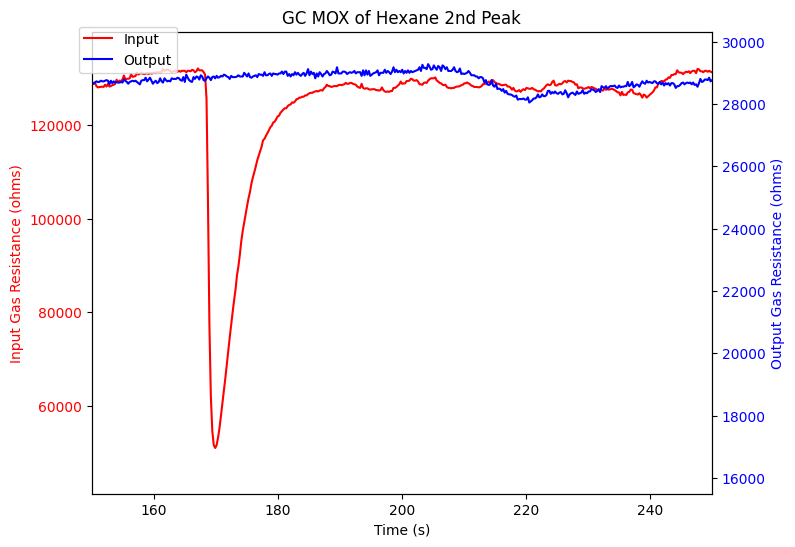

Input peak occurs at time = 169.889 s
Output peak occurs at time = 220.551 s
front edge: 168.719 s back edge: 173.865 s 
Input width is: 5.146000000000015 s
front edge: 215.171 s back edge: 239.007 s 
Output width is: 23.836000000000013 s
The Input time is:  168.719
The Output time is:  215.171
The total time is:  46.452


In [32]:
plot_gc(t_76, t_77, gas_input, gas_output, 150, 250, 'GC MOX of Hexane 2nd Peak')
get_peak_width(160, 190, 200,250,"hexane")

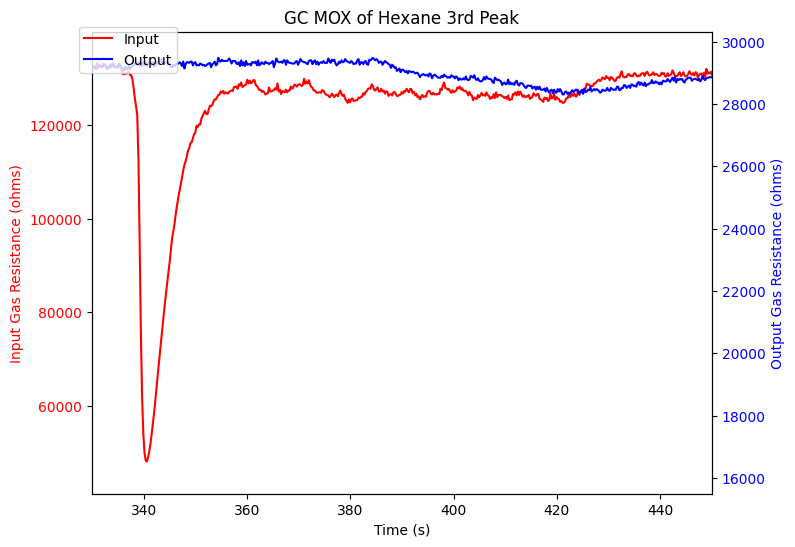

Input peak occurs at time = 340.65 s
Output peak occurs at time = 421.094 s
front edge: 339.246 s back edge: 345.095 s 
Input width is: 5.849000000000046 s
front edge: 396.059 s back edge: 448.217 s 
Output width is: 52.15799999999996 s
The Input time is:  339.246
The Output time is:  396.059
The total time is:  56.813000000000045


In [33]:
plot_gc(t_76, t_77, gas_input, gas_output, 330, 450, 'GC MOX of Hexane 3rd Peak')
get_peak_width(330, 360, 330, 450,"hexane")

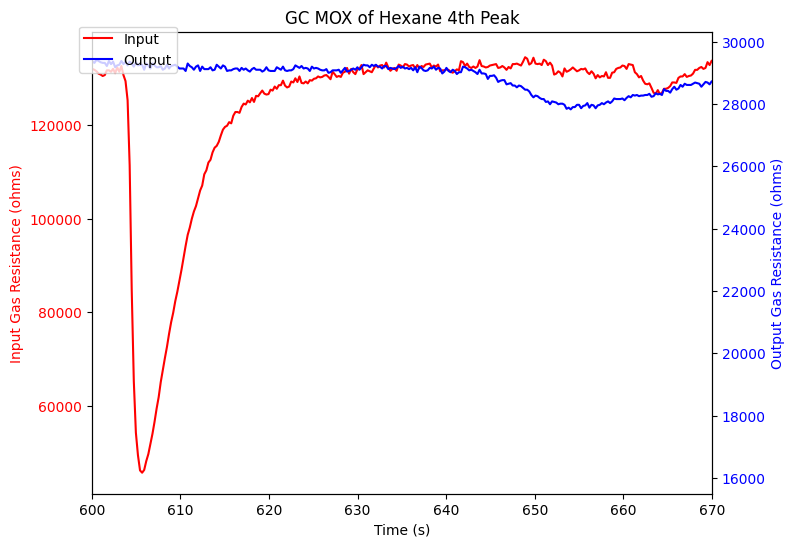

Input peak occurs at time = 605.669 s
Output peak occurs at time = 654.061 s
front edge: 604.495 s back edge: 610.114 s 
Input width is: 5.619000000000028 s
front edge: 647.979 s back edge: 665.755 s 
Output width is: 17.775999999999954 s
The Input time is:  604.495
The Output time is:  647.979
The total time is:  43.48400000000004


In [34]:
plot_gc(t_76, t_77, gas_input, gas_output, 600, 670, 'GC MOX of Hexane 4th Peak')
get_peak_width(600, 625, 630,670,"hexane")

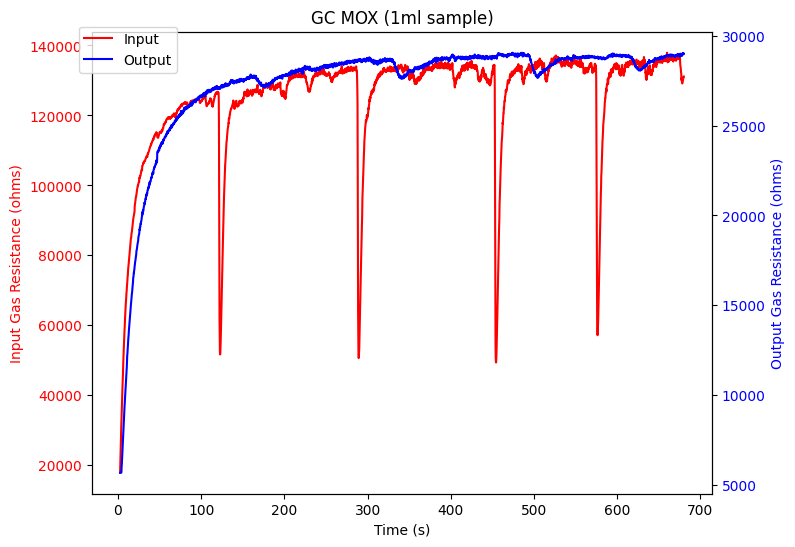

In [35]:
t_76, t_77, gas_input, gas_output = load_csv("hexane_3_2_26_5V_12am.csv")
plot_gc(t_76, t_77, gas_input, gas_output)

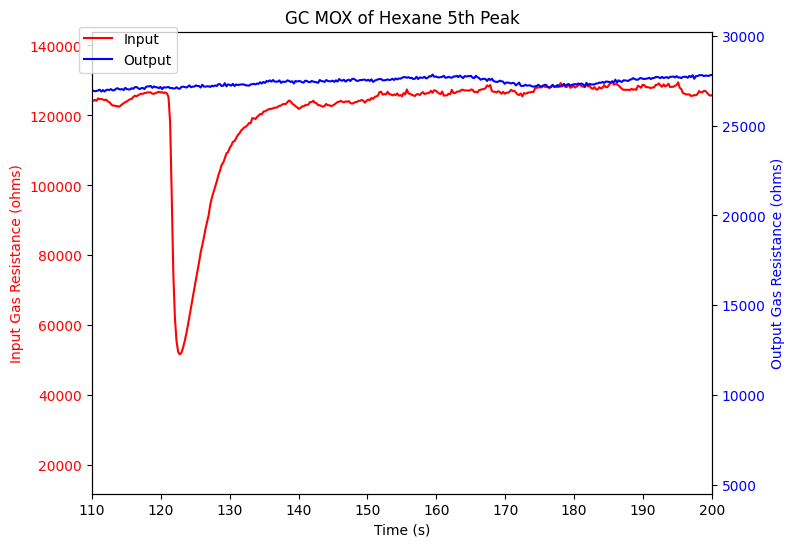

Input peak occurs at time = 122.754 s
Output peak occurs at time = 176.423 s
front edge: 121.587 s back edge: 126.725 s 
Input width is: 5.137999999999991 s
front edge: 169.452 s back edge: 186.69 s 
Output width is: 17.238 s
The Input time is:  121.587
The Output time is:  169.452
The total time is:  47.864999999999995


In [36]:
plot_gc(t_76, t_77, gas_input, gas_output, 110, 200, 'GC MOX of Hexane 5th Peak')
get_peak_width(110, 135, 160,200,"hexane")

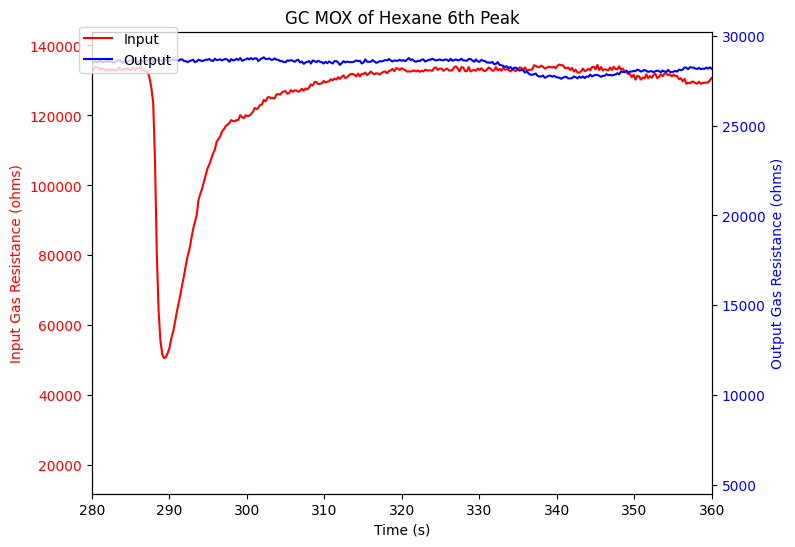

Input peak occurs at time = 289.314 s
Output peak occurs at time = 340.551 s
front edge: 288.378 s back edge: 293.526 s 
Input width is: 5.148000000000025 s
front edge: 334.471 s back edge: 358.334 s 
Output width is: 23.863 s
The Input time is:  288.378
The Output time is:  334.471
The total time is:  46.09300000000002


In [37]:
plot_gc(t_76, t_77, gas_input, gas_output, 280, 360, 'GC MOX of Hexane 6th Peak')
get_peak_width(280, 305, 280,360,"hexane")

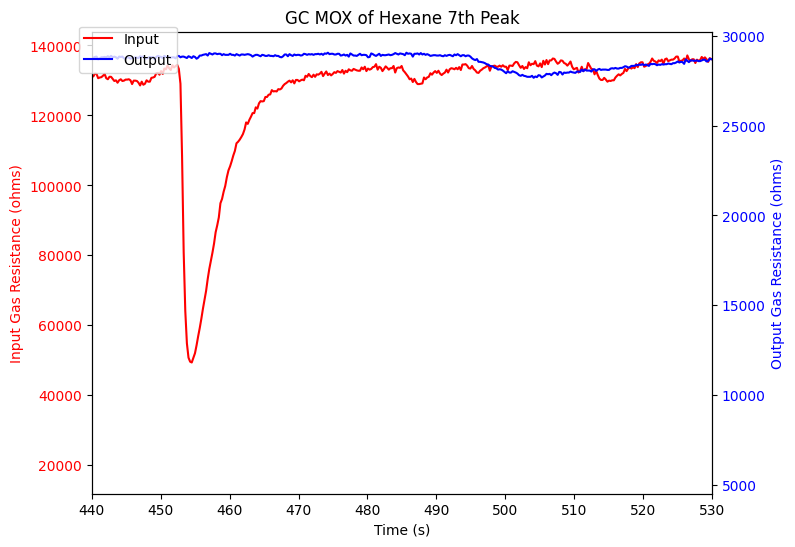

Input peak occurs at time = 454.494 s
Output peak occurs at time = 504.126 s
front edge: 453.322 s back edge: 458.423 s 
Input width is: 5.100999999999999 s
front edge: 497.77 s back edge: 519.235 s 
Output width is: 21.465000000000032 s
The Input time is:  453.322
The Output time is:  497.77
The total time is:  44.44799999999998


In [38]:
plot_gc(t_76, t_77, gas_input, gas_output, 440, 530, 'GC MOX of Hexane 7th Peak')
get_peak_width(440, 470, 440, 530,"hexane")

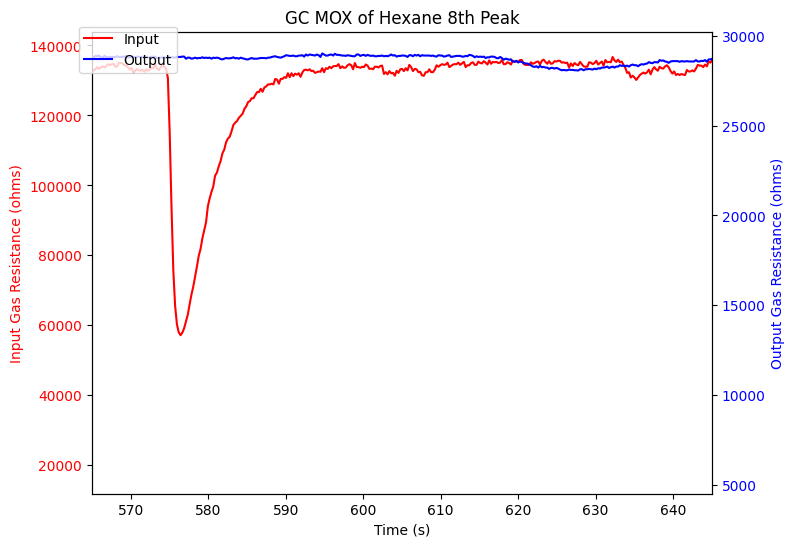

Input peak occurs at time = 576.435 s
Output peak occurs at time = 627.746 s
front edge: 575.271 s back edge: 580.195 s 
Input width is: 4.924000000000092 s
front edge: 620.475 s back edge: 636.87 s 
Output width is: 16.394999999999982 s
The Input time is:  575.271
The Output time is:  620.475
The total time is:  45.204000000000065


In [39]:
plot_gc(t_76, t_77, gas_input, gas_output, 565, 645, 'GC MOX of Hexane 8th Peak')
get_peak_width(565, 590, 565, 640,"hexane")

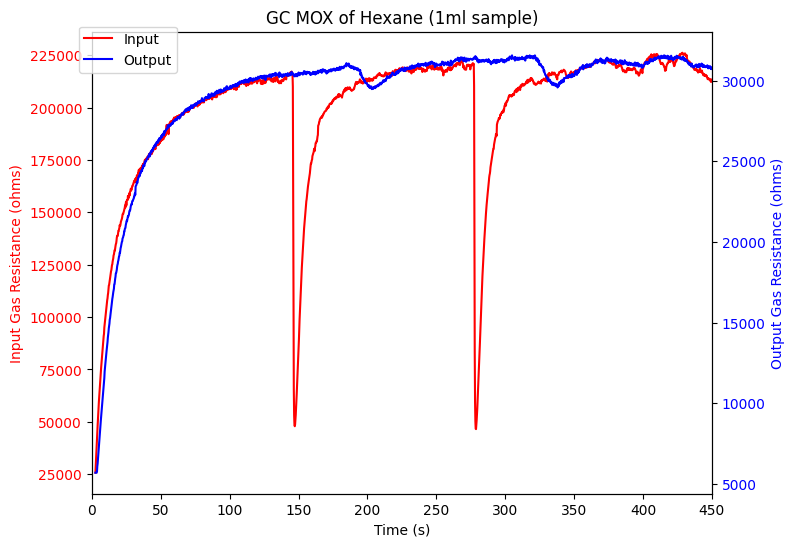

In [40]:
t_76, t_77, gas_input, gas_output = load_csv("hexane_3_2_26_5V_1pm.csv")
plot_gc(t_76, t_77, gas_input, gas_output, 0, 450, 'GC MOX of Hexane (1ml sample)')

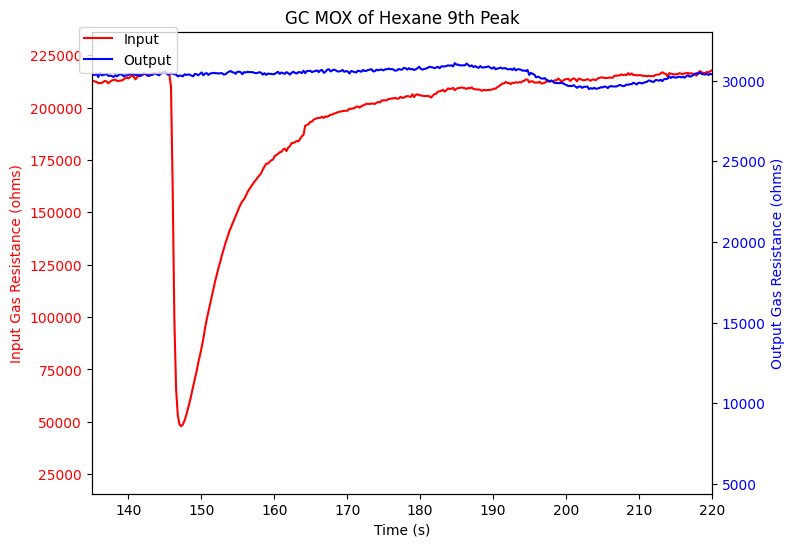

Input peak occurs at time = 147.243 s
Output peak occurs at time = 203.148 s
front edge: 146.074 s back edge: 153.074 s 
Input width is: 7.0 s
front edge: 196.13 s back edge: 214.142 s 
Output width is: 18.012 s
The Input time is:  146.074
The Output time is:  196.13
The total time is:  50.05599999999998


In [41]:
plot_gc(t_76, t_77, gas_input, gas_output, 135, 220, 'GC MOX of Hexane 9th Peak')
get_peak_width(135, 165, 183,220,"hexane")

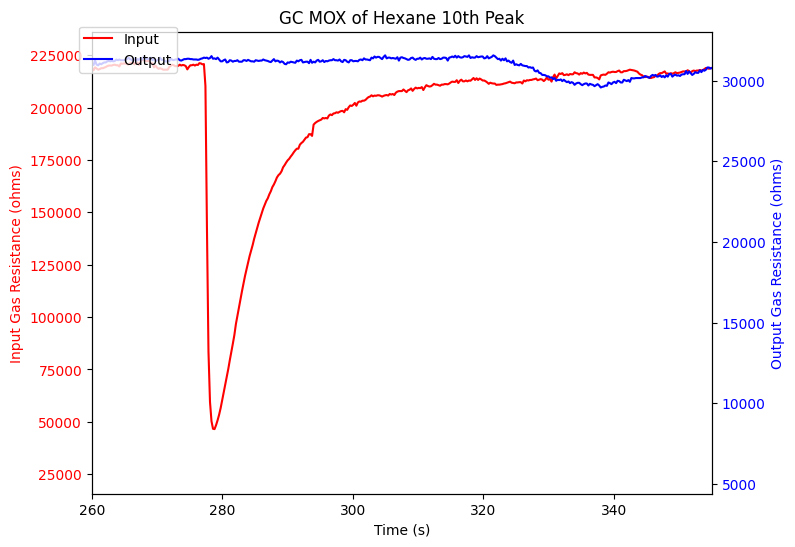

Input peak occurs at time = 278.792 s
Output peak occurs at time = 337.968 s
front edge: 277.626 s back edge: 284.63 s 
Input width is: 7.004000000000019 s
front edge: 328.054 s back edge: 351.513 s 
Output width is: 23.459000000000003 s
The Input time is:  277.626
The Output time is:  328.054
The total time is:  50.428


In [42]:
plot_gc(t_76, t_77, gas_input, gas_output, 260, 355, 'GC MOX of Hexane 10th Peak')
get_peak_width(270, 300, 300, 355,"hexane")

In [43]:
for hexane in hexane_times:
    print("time = ", hexane)

time =  45.40800000000001
time =  46.452
time =  56.813000000000045
time =  43.48400000000004
time =  47.864999999999995
time =  46.09300000000002
time =  44.44799999999998
time =  45.204000000000065
time =  50.05599999999998
time =  50.428


In [44]:
t_76, t_77, gas_input, gas_output = load_csv("iso_propyl.csv")

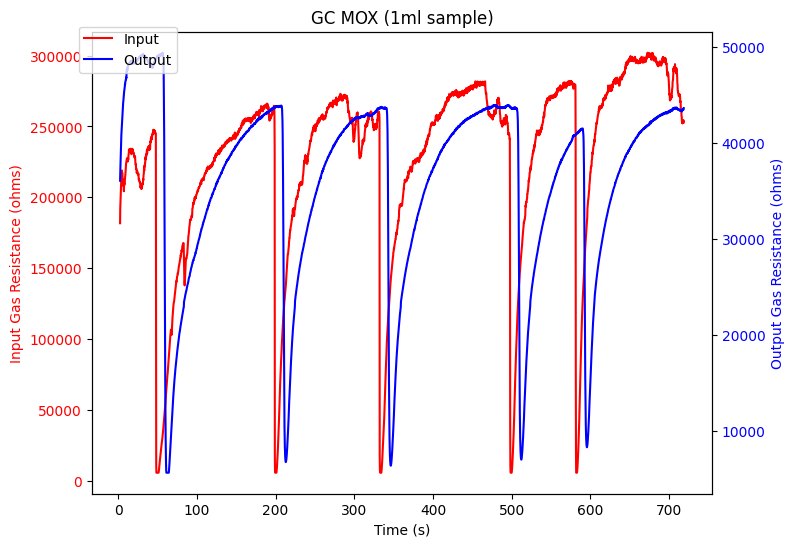

In [45]:
plot_gc(t_76, t_77, gas_input, gas_output)


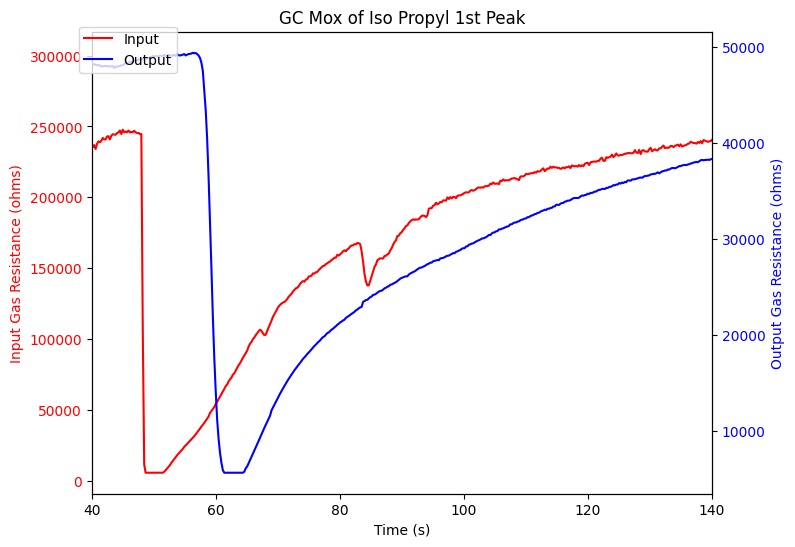

In [53]:
plot_gc(t_76, t_77, gas_input, gas_output, 35, 120, "GC Mox of Iso Propyl 1st Peak")

In [54]:
get_peak_width(30, 140, 50, 140,"hexane")

Input peak occurs at time = 48.665 s
Output peak occurs at time = 61.354 s
front edge: 48.204 s back edge: 71.272 s 
Input width is: 23.068000000000005 s
front edge: 59.278 s back edge: 94.576 s 
Output width is: 35.297999999999995 s
The Input time is:  48.204
The Output time is:  59.278
The total time is:  11.073999999999998


the mean is: 47.4489090909091
the std is: 3.610574909007391


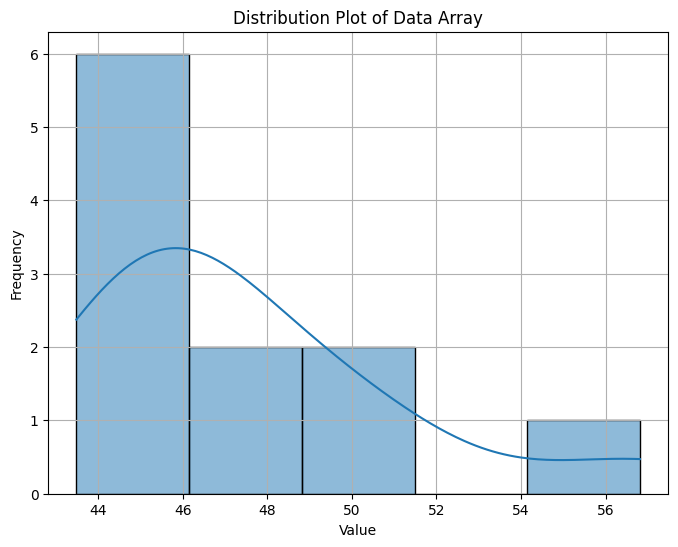

In [47]:
distribution(hexane_times)

the mean is: 39.700799999999994
the std is: 4.9376348751198655


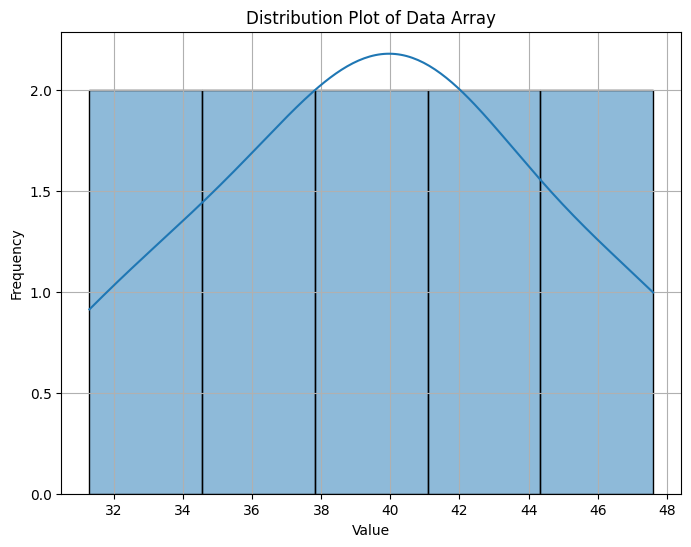

In [48]:
distribution(turps_times)

<function matplotlib.pyplot.show(close=None, block=None)>

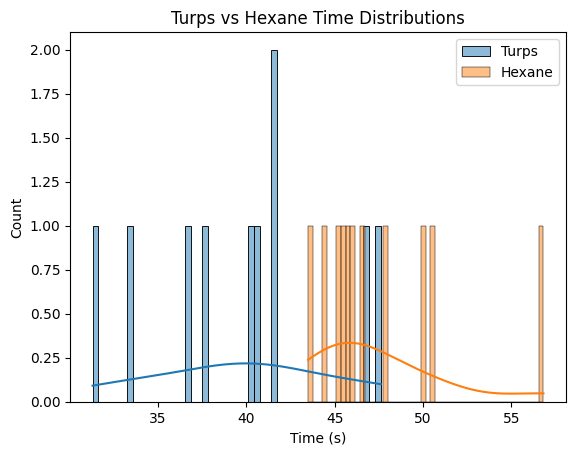

In [49]:
sns.histplot(turps_times, kde = True, bins = 50, alpha = 0.5, label = "Turps")
sns.histplot(hexane_times, kde = True, bins = 50, alpha = 0.5, label = "Hexane")

plt.xlabel("Time (s)")
plt.ylabel("Count")
plt.title("Turps vs Hexane Time Distributions")
plt.legend()
plt.show

the mean is: 5.284727272727292
the std is: 1.2375923172845198


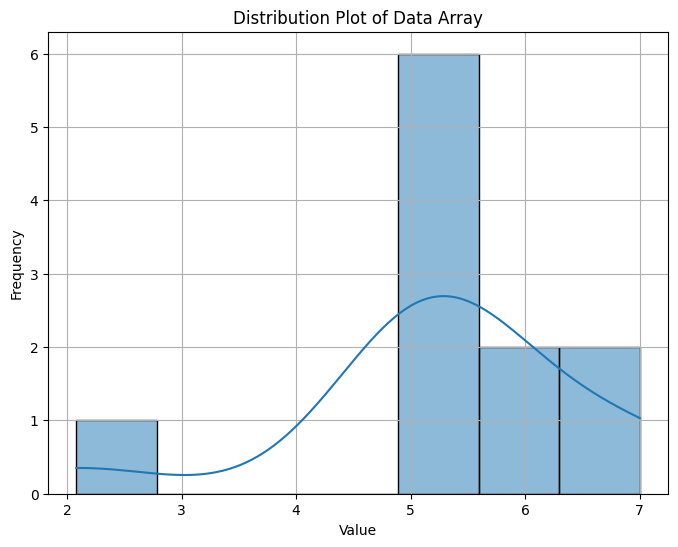

the mean is: 3.8757999999999937
the std is: 0.2645440606023858


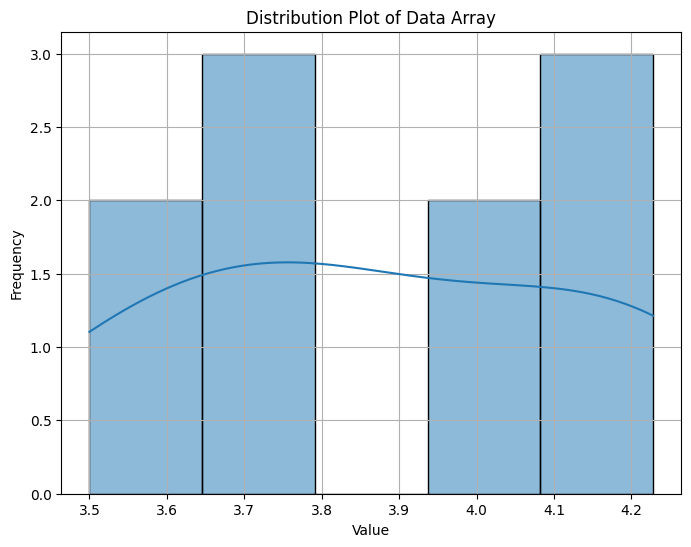

In [50]:
distribution(hexane_widths)
distribution(turps_widths)

<function matplotlib.pyplot.show(close=None, block=None)>

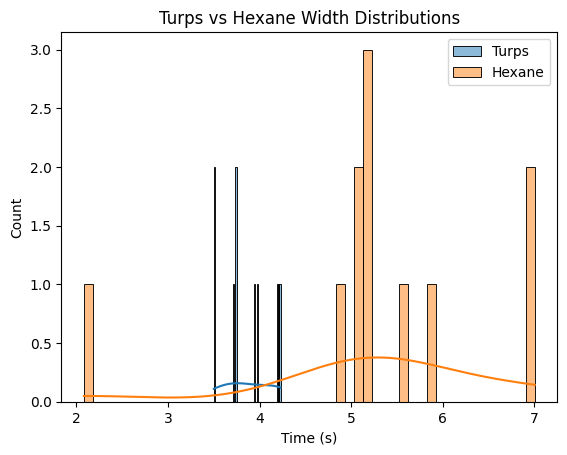

In [51]:
sns.histplot(turps_widths, kde = True, bins = 50, alpha = 0.5, label = "Turps")
sns.histplot(hexane_widths, kde = True, bins = 50, alpha = 0.5, label = "Hexane")

plt.xlabel("Time (s)")
plt.ylabel("Count")
plt.title("Turps vs Hexane Width Distributions")
plt.legend()
plt.show